In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Suresh Goud\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
oneplusTV_reviews = pd.read_csv("oneplusTV_extraction_reviews.csv")
oneplusTV_reviews

,Unnamed: 0,product,title,rating,body
0,0,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Replacement received from Amazon and it's work...,4.0,The media could not be loaded.\n ...
1,1,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Cinematic picture quality with low quality sou...,4.0,TV is beautiful with minute bezels.I was pleas...
2,2,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Y DIS Y series?,1.0,ere is my experience with the Oneplus LAGGY tv...
3,3,OnePlus 108 cm (43 inches) Y Series Full HD LE...,"Contrast Ratio, Viewing Angle, Colours, All Good.",5.0,I will be brief here.Unboxing:No wall Mount.No...
4,4,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Best Budget TV,5.0,After 10 days usage :1. Display is good not be...
...,...,...,...,...,...
5785,5785,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Awesome,5.0,Excellent
5786,5786,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Worth every penny,5.0,All good
5787,5787,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Awesome,5.0,Very good
5788,5788,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Quality,4.0,Only the besals are not good


# Exploratory Data Analysis

In [3]:
oneplusTV_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790 entries, 0 to 5789
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5790 non-null   int64  
 1   product     5790 non-null   object 
 2   title       5789 non-null   object 
 3   rating      5790 non-null   float64
 4   body        5747 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 226.3+ KB


In [4]:
print(oneplusTV_reviews.shape)
print(oneplusTV_reviews.isnull().sum())

(5790, 5)
Unnamed: 0     0
product        0
title          1
rating         0
body          43
dtype: int64


In [5]:
oneplusTV_reviews.dropna(axis = 0, inplace = True)
print(oneplusTV_reviews.shape)

(5747, 5)


In [6]:
oneplusTV_reviews.columns

Index(['Unnamed: 0', 'product', 'title', 'rating', 'body'], dtype='object')

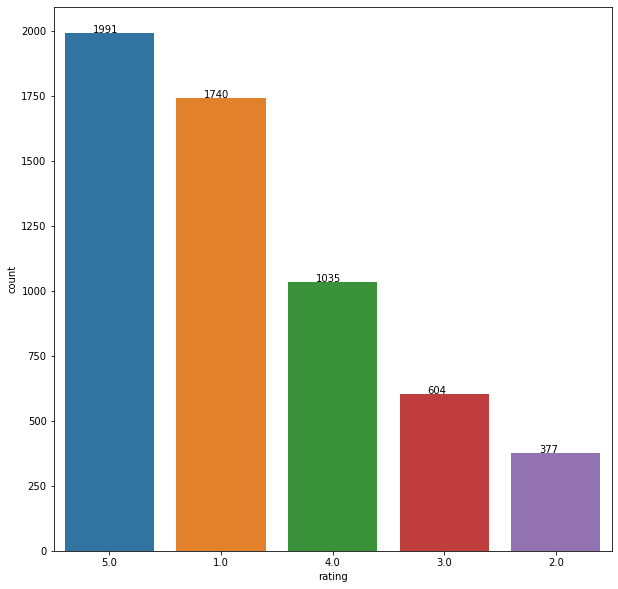

In [7]:
plt.figure(figsize =(10,10))

ax = sns.countplot(x=oneplusTV_reviews["rating"], data = oneplusTV_reviews, order = oneplusTV_reviews["rating"].value_counts().index )
for p, label in zip(ax.patches, oneplusTV_reviews["rating"].value_counts()):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

In [8]:
op=",".join(map(str,oneplusTV_reviews["body"])) #removing spaces and joinng all sentences as text
op

'The media could not be loaded.\n                \n\n\n\n\n  \xa0Never expected to write a negative review for OnePlus Product !1. Screen Flickering is the most common problem2. Half of the times, TV doesn\'t start with a single button press.3. Booting takes atleast 20 seconds4. Screen goes all the ways blank in middle of play time.5. Audio is dud - Not sufficient for my 10X10 ft bedroom6. System lag is the maximum in this class of TV\'sEdit: 23/07/2020Amazon declined to replace and offered refund of 19,600/- as against 23k which I paid for the TV. All I have to do now is to live with a defective TV, as I had invested in the wallmount and the allied services. OnePlus SettledEdit: 27/07/2020Product is back in stock. Amazon accepted for replacement after technician report. But, defective product is yet to be picked up and the replacement is yet to be shipped. Awaiting further details. Brand is not at all acting in the customers interest. Very bad response for OnePlus.Edit: 6/8/2020Receiv

In [9]:
import re
op1 = re.sub("[^A-Za-z" "]+"," ",op).lower() #to remove  any unwanted characters and coverting whole text into lowercase
op1

'the media could not be loaded never expected to write a negative review for oneplus product screen flickering is the most common problem half of the times tv doesn t start with a single button press booting takes atleast seconds screen goes all the ways blank in middle of play time audio is dud not sufficient for my x ft bedroom system lag is the maximum in this class of tv sedit amazon declined to replace and offered refund of as against k which i paid for the tv all i have to do now is to live with a defective tv as i had invested in the wallmount and the allied services oneplus settlededit product is back in stock amazon accepted for replacement after technician report but defective product is yet to be picked up and the replacement is yet to be shipped awaiting further details brand is not at all acting in the customers interest very bad response for oneplus edit received the replacement tv from amazon and the tv if working fine as of now i installed it on the wall by myself a bit

In [10]:
oneplus_reviews_words = op1.split(" ")
print(len(oneplus_reviews_words))
oneplus_reviews_words

171874


['the',
 'media',
 'could',
 'not',
 'be',
 'loaded',
 'never',
 'expected',
 'to',
 'write',
 'a',
 'negative',
 'review',
 'for',
 'oneplus',
 'product',
 'screen',
 'flickering',
 'is',
 'the',
 'most',
 'common',
 'problem',
 'half',
 'of',
 'the',
 'times',
 'tv',
 'doesn',
 't',
 'start',
 'with',
 'a',
 'single',
 'button',
 'press',
 'booting',
 'takes',
 'atleast',
 'seconds',
 'screen',
 'goes',
 'all',
 'the',
 'ways',
 'blank',
 'in',
 'middle',
 'of',
 'play',
 'time',
 'audio',
 'is',
 'dud',
 'not',
 'sufficient',
 'for',
 'my',
 'x',
 'ft',
 'bedroom',
 'system',
 'lag',
 'is',
 'the',
 'maximum',
 'in',
 'this',
 'class',
 'of',
 'tv',
 'sedit',
 'amazon',
 'declined',
 'to',
 'replace',
 'and',
 'offered',
 'refund',
 'of',
 'as',
 'against',
 'k',
 'which',
 'i',
 'paid',
 'for',
 'the',
 'tv',
 'all',
 'i',
 'have',
 'to',
 'do',
 'now',
 'is',
 'to',
 'live',
 'with',
 'a',
 'defective',
 'tv',
 'as',
 'i',
 'had',
 'invested',
 'in',
 'the',
 'wallmount',
 'and',


In [20]:
with open("D:\\DATA SCIENCE\\CODES\\Text Mining\\stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")
stopwords

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [24]:
stop_op = " ".join ([w for w in oneplus_reviews_words if not w in stopwords])
stop_op

'media loaded expected write negative review oneplus product screen flickering common problem half times tv doesn start single button press booting takes atleast seconds screen ways blank middle play time audio dud sufficient ft bedroom system lag maximum class tv sedit amazon declined replace offered refund paid tv live defective tv invested wallmount allied services oneplus settlededit product back stock amazon accepted replacement technician report defective product picked replacement shipped awaiting details brand acting customers interest bad response oneplus edit received replacement tv amazon tv working fine installed wall bit lag sound issues screen stuttering tv beautiful minute bezels pleased picture quality firsti expected smooth software oneplus tv operation bit slow due gb ram lower clocked processor complaint price point oneplus release optimized software update software update reason buy tv oneplus response bluetooth remote bit slow hold bluetooth functional bluetooth tv

# Wordclouds

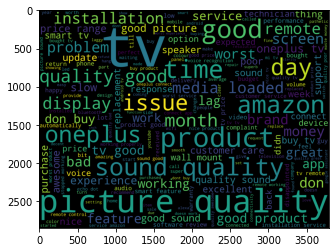

In [25]:
wordcloud_oneplus_entire= WordCloud(
                      background_color='black',
                      width=3800,
                      height=2850
                     ).generate(stop_op)

plt.imshow(wordcloud_oneplus_entire)      #entire reviews wordcloud

In [13]:
with open("D:\\DATA SCIENCE\\CODES\\Text Mining\\positive-words.txt","r") as p:
  pwords = p.read().split("\n")
pwords

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [14]:
pos_op = " ".join ([w for w in oneplus_reviews_words if w in pwords])
pos_op

'sufficient refund fine beautiful pleased smooth better great enhance improved smart wonders best happy better like good good promise best good happy worked pros amazing amazing fine awesome awesome won clarity good better good good best better well decent modern well perfect best smart advantage works like charm liked best better enough work support crisp promised free worth free promptly good like awesome proper properly best good saver support support free perfectly proper support saver led good compatible refund kindly free refunded work cashback good bright good good good best well better good good available clean free support available like smart good good supports work work enjoy brilliant affordable worth pros nice saver available saver well well led wow improve led good good awesome best available eagerly super delight great quiet work viewable like won work works flawlessly works good love enough supported like good works fine best top patience worthy good good like balanced 

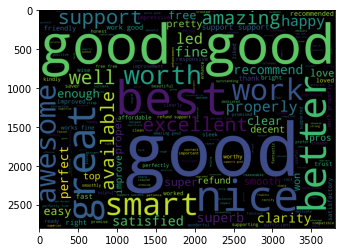

In [15]:
pos_wordcloud = WordCloud(
                      background_color='black',
                      width=3800,
                      height=2800
                     ).generate(pos_op)

plt.imshow(pos_wordcloud) #positive wordcloud

In [16]:
with open("D:\\DATA SCIENCE\\CODES\\Text Mining\\negative-words.txt","r") as n:
  nwords = n.read().split("\n")
nwords

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [17]:
Neg_op = " ".join ([w for w in oneplus_reviews_words if w in nwords])
Neg_op

'negative flickering problem dud lag defective defective bad lag issues stuttering slow complaint slow buggy laggy issues unable struggling shocking bad laggy ignore limited worst worst hard cons poor laggy lag issues poorer bugs lag lag blur concerned blur blur draining bleeding negative negative useless disaster fat hard disappointed issue issues hell delay bad issue defective problem poor hard problem sorry sucks missed unable issue issue errors fat marginal noise lags poor poor setback fall cheap cheap worst bad disturbance negative confusing complaining misses lags lags lag loud hard complaint loud lag gimmick confuse laggy lag lag untrue lag delayed problem fail negative problem worried concern loss issues confusion beware lack issue lag fail complained confused regretted worst hell disappointed disaster fool disappointed bad worst bad disappointing issues bugs laggy bad cheap cheap bleeding loss loud difficult lag distracting cons congestion problem lags cold worst worst issue p

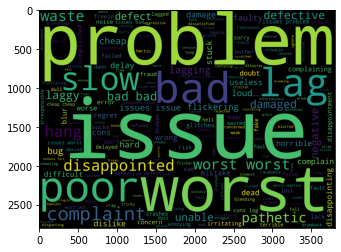

In [18]:
Neg_wordcloud = WordCloud(
                      background_color='black',
                      width=3800,
                      height=2800
                     ).generate(Neg_op)

plt.imshow(Neg_wordcloud) #negative wordcloud

## ANALYSING THE REVIEWS

In [26]:
reviews = oneplusTV_reviews["body"]
reviews

0       The media could not be loaded.\n              ...
1       TV is beautiful with minute bezels.I was pleas...
2       ere is my experience with the Oneplus LAGGY tv...
3       I will be brief here.Unboxing:No wall Mount.No...
4       After 10 days usage :1. Display is good not be...
                              ...                        
5785                                            Excellent
5786                                             All good
5787                                            Very good
5788                         Only the besals are not good
5789           Very low visual and sound....cheap quality
Name: body, Length: 5747, dtype: object

In [27]:
# Create a pandas dataframe from array
df = pd.DataFrame(np.array(reviews), columns=['review'])
df

,review
0,The media could not be loaded.\n ...
1,TV is beautiful with minute bezels.I was pleas...
2,ere is my experience with the Oneplus LAGGY tv...
3,I will be brief here.Unboxing:No wall Mount.No...
4,After 10 days usage :1. Display is good not be...
...,...
5742,Excellent
5743,All good
5744,Very good
5745,Only the besals are not good


### Word Count – total number of words in each review

In [28]:
# Calculate word count
df['word_count'] = df['review'].apply(lambda x: len(str(x).split(" ")))

In [29]:
df.head()

,review,word_count
0,The media could not be loaded.\n ...,217
1,TV is beautiful with minute bezels.I was pleas...,246
2,ere is my experience with the Oneplus LAGGY tv...,455
3,I will be brief here.Unboxing:No wall Mount.No...,106
4,After 10 days usage :1. Display is good not be...,71


### Stopword Count – total number of words which are considered stop words

Natural Language Toolkit (NLTK) is a toolkit build for working with NLP in Python. It provides us various text processing libraries with a lot of test datasets. A variety of tasks can be performed using NLTK such as tokenizing, parse tree visualization, etc…

Several algorithms are available for text tokenization, stemming, stop word removal, classification, clustering, PoS tagging, parsing, and semantic reasoning. It also provides wrappers for other NLP libraries.

tokenize with a word_tokenize() method that will help us split a text into tokens.

In [30]:
from nltk.corpus import stopwords

#### Calculate number of stop words

In [31]:
stop_words = stopwords.words('english')
df['stopword_coun'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop_words]))

In [32]:
df.head()

,review,word_count,stopword_coun
0,The media could not be loaded.\n ...,217,84
1,TV is beautiful with minute bezels.I was pleas...,246,75
2,ere is my experience with the Oneplus LAGGY tv...,455,187
3,I will be brief here.Unboxing:No wall Mount.No...,106,26
4,After 10 days usage :1. Display is good not be...,71,18


In [33]:
df.describe()

,word_count,stopword_coun
count,5747.000000,5747.000000
mean,30.701583,10.584653
std,48.206398,19.057635
min,1.000000,0.000000
25%,6.000000,1.000000
50%,18.000000,5.000000
75%,35.500000,13.000000
max,872.000000,377.000000


# CLEANING THE DATA SET


Well the same applies to natural language processing and sentiment analysis. Cleaning text is a little different to regular data cleaning in that, well, you’re dealing with strings of text rather than records of data. Regardless, cleaning the data is still important. The four most common steps that are performed are;

1.Lowercasing all words

2.Removing punctuation

3.Removing stopwords

4.Removing trivial words (excessively short and frequent words e.g. A, I, us)

In [34]:
# Lower case all words
df['review_lower'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [35]:
# Remove Punctuation
df['review_nopunc'] = df['review_lower'].str.replace('[^\w\s]', '')

In [36]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Remove Stopwords
df['review_nopunc_nostop'] = df['review_nopunc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [37]:
df.head()

,review,word_count,stopword_coun,review_lower,review_nopunc,review_nopunc_nostop
0,The media could not be loaded.\n ...,217,84,the media could not be loaded. never expected ...,the media could not be loaded never expected t...,media could loaded never expected write negati...
1,TV is beautiful with minute bezels.I was pleas...,246,75,tv is beautiful with minute bezels.i was pleas...,tv is beautiful with minute bezelsi was please...,tv beautiful minute bezelsi pleased picture qu...
2,ere is my experience with the Oneplus LAGGY tv...,455,187,ere is my experience with the oneplus laggy tv...,ere is my experience with the oneplus laggy tv...,ere experience oneplus laggy tv32y model list ...
3,I will be brief here.Unboxing:No wall Mount.No...,106,26,i will be brief here.unboxing:no wall mount.no...,i will be brief hereunboxingno wall mountno di...,brief hereunboxingno wall mountno display cabl...
4,After 10 days usage :1. Display is good not be...,71,18,after 10 days usage :1. display is good not be...,after 10 days usage 1 display is good not best...,10 days usage 1 display good best2 sound could...


In [38]:
# Return frequency of values
freq= pd.Series(" ".join(df['review_nopunc_nostop']).split()).value_counts()
freq

tv            4123
quality       2523
good          2183
product       1504
one           1383
              ... 
hdrdolby         1
web3             1
feable           1
hanger           1
soundcheap       1
Length: 8443, dtype: int64

# LEMMATIZE THE REVIEWS

Lemmatization is the process of transforming your natural text from english to lemming language.

I kid, it’s the process of translating words back to their base form.

Lemmatization Example

    am, are, is would be lemmatized to be

    car, cars, car’s, cars’ would be lemmatized to car

This cuts out the number of words that are available for analysis by combining similar forms into one base form. One of other processes that is commonly used to cut down the the number of unique words in natural text processing is a process called stemming.

Stemming shortens the number of unique words by removing common endings.

Example:

    Caresses is stemmed to caress

    Ponies is stemmed to poni

Some words can stand alone without the extended ending however as shown with the word ponies above, this is not always the case. In this case we’ll use lemmatization to shorten down our word lsit.

The text blob module provides a simple method to lemmatize the reviews.

In [39]:
import textblob
from textblob import Word

In [41]:
# Lemmatize final review format
df['cleaned_review'] = df['review_nopunc_nostop'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [42]:
df.head()

,review,word_count,stopword_coun,review_lower,review_nopunc,review_nopunc_nostop,cleaned_review
0,The media could not be loaded.\n ...,217,84,the media could not be loaded. never expected ...,the media could not be loaded never expected t...,media could loaded never expected write negati...,medium could loaded never expected write negat...
1,TV is beautiful with minute bezels.I was pleas...,246,75,tv is beautiful with minute bezels.i was pleas...,tv is beautiful with minute bezelsi was please...,tv beautiful minute bezelsi pleased picture qu...,tv beautiful minute bezelsi pleased picture qu...
2,ere is my experience with the Oneplus LAGGY tv...,455,187,ere is my experience with the oneplus laggy tv...,ere is my experience with the oneplus laggy tv...,ere experience oneplus laggy tv32y model list ...,ere experience oneplus laggy tv32y model list ...
3,I will be brief here.Unboxing:No wall Mount.No...,106,26,i will be brief here.unboxing:no wall mount.no...,i will be brief hereunboxingno wall mountno di...,brief hereunboxingno wall mountno display cabl...,brief hereunboxingno wall mountno display cabl...
4,After 10 days usage :1. Display is good not be...,71,18,after 10 days usage :1. display is good not be...,after 10 days usage 1 display is good not best...,10 days usage 1 display good best2 sound could...,10 day usage 1 display good best2 sound could ...


#  SENTIMENT ANALYSIS

After all that cleaning actually performing the sentiment analysis is really quite straight forward. The textblob module again comes in quite handy for this task and returns not only sentiment metric but also a subjectivity metric as well.

The polarity metric refers to the degree to which the text analysed is positive or negative, between a range of -1 to 1. A score of 1 means highly positive whereas -1 is considered well and truly negative.

In [43]:
# Calculate polarity
from textblob import TextBlob


In [44]:
df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment)

0       (-0.04115884115884113, 0.28827838827838825)
1          (0.1314393939393939, 0.4159090909090909)
2        (0.04771825396825395, 0.35724206349206344)
3         (0.40925925925925927, 0.5907407407407407)
4          (0.3961309523809524, 0.4071428571428572)
                           ...                     
5742                                     (1.0, 1.0)
5743                      (0.7, 0.6000000000000001)
5744                      (0.7, 0.6000000000000001)
5745                      (0.7, 0.6000000000000001)
5746                                    (0.0, 0.15)
Name: cleaned_review, Length: 5747, dtype: object

In [45]:
df['polarity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment[0])

We can also analyse subjectivity, this is the degree to which the text analysed relates to personal emotion or factual information between a scale of 0 to 1. With scores closer to one indicating a higher level of subjectivity and being based mostly on opinion.

In [46]:
# Calculate subjectivity
df['subjectivity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment[1])

In [47]:
df.head()

,review,word_count,stopword_coun,review_lower,review_nopunc,review_nopunc_nostop,cleaned_review,polarity,subjectivity
0,The media could not be loaded.\n ...,217,84,the media could not be loaded. never expected ...,the media could not be loaded never expected t...,media could loaded never expected write negati...,medium could loaded never expected write negat...,-0.041159,0.288278
1,TV is beautiful with minute bezels.I was pleas...,246,75,tv is beautiful with minute bezels.i was pleas...,tv is beautiful with minute bezelsi was please...,tv beautiful minute bezelsi pleased picture qu...,tv beautiful minute bezelsi pleased picture qu...,0.131439,0.415909
2,ere is my experience with the Oneplus LAGGY tv...,455,187,ere is my experience with the oneplus laggy tv...,ere is my experience with the oneplus laggy tv...,ere experience oneplus laggy tv32y model list ...,ere experience oneplus laggy tv32y model list ...,0.047718,0.357242
3,I will be brief here.Unboxing:No wall Mount.No...,106,26,i will be brief here.unboxing:no wall mount.no...,i will be brief hereunboxingno wall mountno di...,brief hereunboxingno wall mountno display cabl...,brief hereunboxingno wall mountno display cabl...,0.409259,0.590741
4,After 10 days usage :1. Display is good not be...,71,18,after 10 days usage :1. display is good not be...,after 10 days usage 1 display is good not best...,10 days usage 1 display good best2 sound could...,10 day usage 1 display good best2 sound could ...,0.396131,0.407143


In [49]:
df.drop(["review_lower", "review_nopunc", "review_nopunc_nostop"], axis = 1, inplace = True)

In [50]:
df

,review,word_count,stopword_coun,cleaned_review,polarity,subjectivity
0,The media could not be loaded.\n ...,217,84,medium could loaded never expected write negat...,-0.041159,0.288278
1,TV is beautiful with minute bezels.I was pleas...,246,75,tv beautiful minute bezelsi pleased picture qu...,0.131439,0.415909
2,ere is my experience with the Oneplus LAGGY tv...,455,187,ere experience oneplus laggy tv32y model list ...,0.047718,0.357242
3,I will be brief here.Unboxing:No wall Mount.No...,106,26,brief hereunboxingno wall mountno display cabl...,0.409259,0.590741
4,After 10 days usage :1. Display is good not be...,71,18,10 day usage 1 display good best2 sound could ...,0.396131,0.407143
...,...,...,...,...,...,...
5742,Excellent,1,0,excellent,1.000000,1.000000
5743,All good,2,0,good,0.700000,0.600000
5744,Very good,2,0,good,0.700000,0.600000
5745,Only the besals are not good,6,3,besals good,0.700000,0.600000


In [51]:
df.sort_values(by="polarity")

,review,word_count,stopword_coun,cleaned_review,polarity,subjectivity
4785,"Worst brand I have ever seen, Worst product I ...",12,2,worst brand ever seen worst product ever seen,-1.0,1.0
1034,The media could not be loaded.\n ...,35,7,medium could loaded worst tv brought lifeyou g...,-1.0,1.0
1422,Please don't buy this product.. This is a defe...,24,8,please dont buy product defective product wors...,-1.0,1.0
5510,Worst product,2,0,worst product,-1.0,1.0
1132,The worst picture quality I have ever seen on ...,25,8,worst picture quality ever seen tv returning i...,-1.0,1.0
...,...,...,...,...,...,...
102,"Excellent picture quality, value for money",6,1,excellent picture quality value money,1.0,1.0
3496,Best result and picture quality.,5,1,best result picture quality,1.0,0.3
3491,"No one beat at this price best ,one of the bes...",18,6,one beat price best one best online brand like...,1.0,0.3
222,Awesome tv,2,0,awesome tv,1.0,1.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5747 entries, 0 to 5746
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          5747 non-null   object 
 1   word_count      5747 non-null   int64  
 2   stopword_coun   5747 non-null   int64  
 3   cleaned_review  5747 non-null   object 
 4   polarity        5747 non-null   float64
 5   subjectivity    5747 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 269.5+ KB


In [74]:
df2 = df.iloc[:,[0,3,4]]


In [75]:
df2 = pd.DataFrame(df2)
df2

,review,cleaned_review,polarity
0,The media could not be loaded.\n ...,medium could loaded never expected write negat...,-0.041159
1,TV is beautiful with minute bezels.I was pleas...,tv beautiful minute bezelsi pleased picture qu...,0.131439
2,ere is my experience with the Oneplus LAGGY tv...,ere experience oneplus laggy tv32y model list ...,0.047718
3,I will be brief here.Unboxing:No wall Mount.No...,brief hereunboxingno wall mountno display cabl...,0.409259
4,After 10 days usage :1. Display is good not be...,10 day usage 1 display good best2 sound could ...,0.396131
...,...,...,...
5742,Excellent,excellent,1.000000
5743,All good,good,0.700000
5744,Very good,good,0.700000
5745,Only the besals are not good,besals good,0.700000


In [76]:
df2.to_csv("sentiment_oneplus_reviews.csv")